In [1]:
# import dependencies
from api_keys import alpha_vantage_api_key
from datetime import datetime, timedelta
import pprint as pp
import pandas as pd
import requests
import matplotlib.pyplot as plt

Get API data and put it in json

In [2]:
# declare codes of tickers used for the manufacturers
codes = ["AAPL", "MSI", "GOOG", "GOOGL"]
manufacturers = ["apple", "motorola", "google_class_c", "google_class_a"]

# declare date to end analysis at
day_end = '2023/05/9'

# declare dates and closing_vals
dates = []
open_vals = []
high_vals = []
low_vals = []
closing_vals = []
adj_closing_vals = []
volumes = []
dividends = []

# create dataframe dictionary
dfs = {}

# initialize counter
counter = 0

# set number of days to go back
num_days = 1825

# main for loop that loops through the ticker codes
for code in codes:
    # get jsons
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={code}&outputsize=full&apikey={alpha_vantage_api_key}'
    response = requests.get(url)
    data_json = response.json()
    
    # set current day as the day we decided to end
    current_day = datetime.strptime(day_end,'%Y/%m/%d') - timedelta(days=num_days)
    
    # loop that goes through all the days in question, starting in the past
    for i in range(num_days):
        try:
            current_day_str = current_day.strftime('%Y-%m-%d')
            open_vals.append(float(data_json["Time Series (Daily)"]
                                    [current_day_str]["1. open"]))
            high_vals.append(float(data_json["Time Series (Daily)"]
                                    [current_day_str]["2. high"]))
            low_vals.append(float(data_json["Time Series (Daily)"]
                                    [current_day_str]["3. low"]))
            closing_vals.append(float(data_json["Time Series (Daily)"]
                                    [current_day_str]["4. close"]))
            adj_closing_vals.append(float(data_json["Time Series (Daily)"]
                                    [current_day_str]["5. adjusted close"]))
            volumes.append(float(data_json["Time Series (Daily)"]
                                    [current_day_str]["6. volume"]))
            dividends.append(float(data_json["Time Series (Daily)"]
                                    [current_day_str]["7. dividend amount"]))
            dates.append(current_day)
        except:
            pass
        current_day = current_day + timedelta(days=1)
    
    # make a dictionary that contains lists of the values
    data_dict = {
    "Date" : dates,
    "Open" : open_vals,    
    "High" : high_vals,    
    "Close" : closing_vals,    
    "Adjusted Close" : adj_closing_vals,
    "Volume" : volumes,
    "Dividends" : dividends
    }
    
    # make a dataframe out of the dicitonary
    data_df = pd.DataFrame(data_dict)
    
    # assign each dataframe as a value in a dataframe dictionary
    dfs[f"{manufacturers[counter]}_df"] = data_df
    
    # clear all the lists so that they can be used in the next iteration of loop
    dates.clear()
    open_vals.clear()
    high_vals.clear()
    low_vals.clear()
    adj_closing_vals.clear()
    closing_vals.clear()
    volumes.clear()
    dividends.clear()
    data_dict = data_dict.clear()
    
    # increment the counter
    counter = counter + 1
    
    

In [3]:
apple_df = dfs["apple_df"]
apple_df.to_csv("resources/apple_stock_daily.csv")
apple_df

,Date,Open,High,Close,Adjusted Close,Volume,Dividends
0,2018-05-10,187.740,190.37,190.04,45.288145,27989289.0,0.00
1,2018-05-11,189.490,190.06,188.59,45.116563,26212221.0,0.73
2,2018-05-14,189.010,189.53,188.15,45.011301,20778772.0,0.00
3,2018-05-15,186.780,187.07,186.44,44.602216,23695159.0,0.00
4,2018-05-16,186.070,188.46,188.18,45.018478,19183064.0,0.00
...,...,...,...,...,...,...,...
1252,2023-05-02,170.090,170.35,168.54,168.540000,48425696.0,0.00
1253,2023-05-03,169.500,170.92,167.45,167.450000,65136018.0,0.00
1254,2023-05-04,164.890,167.04,165.79,165.790000,81235427.0,0.00
1255,2023-05-05,170.975,174.30,173.57,173.570000,113453171.0,0.00


In [4]:
motorola_df = dfs["motorola_df"]
motorola_df.to_csv('resources/motorola_stock_daily.csv')
motorola_df

,Date,Open,High,Close,Adjusted Close,Volume,Dividends
0,2018-05-10,106.32,108.9200,108.75,100.779125,1517801.0,0.0
1,2018-05-11,108.59,108.6700,108.37,100.426977,1065483.0,0.0
2,2018-05-14,108.43,109.3400,107.38,99.509540,1239310.0,0.0
3,2018-05-15,107.02,108.0600,107.98,100.065562,1145615.0,0.0
4,2018-05-16,107.92,108.3500,107.30,99.435403,968471.0,0.0
...,...,...,...,...,...,...,...
1252,2023-05-02,293.94,294.6575,293.16,293.160000,665788.0,0.0
1253,2023-05-03,295.00,295.0000,288.62,288.620000,595591.0,0.0
1254,2023-05-04,288.13,292.6700,290.41,290.410000,968799.0,0.0
1255,2023-05-05,285.12,288.8600,281.56,281.560000,1501288.0,0.0


In [5]:
google_class_c_df = dfs["google_class_c_df"]
google_class_c_df.to_csv("resources/google_class_c_stock_daily.csv")
google_class_c_df

,Date,Open,High,Close,Adjusted Close,Volume,Dividends
0,2018-05-10,1086.030,1100.44,1097.570,54.8785,1443025.0,0.0
1,2018-05-11,1093.600,1101.33,1098.260,54.9130,1253665.0,0.0
2,2018-05-14,1100.000,1110.75,1100.200,55.0100,1518077.0,0.0
3,2018-05-15,1090.000,1090.05,1079.230,53.9615,1494872.0,0.0
4,2018-05-16,1077.310,1089.27,1081.770,54.0885,1097317.0,0.0
...,...,...,...,...,...,...,...
1252,2023-05-02,107.660,107.73,105.980,105.9800,20343116.0,0.0
1253,2023-05-03,106.220,108.13,106.120,106.1200,17116333.0,0.0
1254,2023-05-04,106.160,106.30,105.210,105.2100,19780637.0,0.0
1255,2023-05-05,105.320,106.44,106.215,106.2150,20710627.0,0.0


In [6]:
google_class_a_df = dfs["google_class_a_df"]
google_class_a_df.to_csv("resources/google_class_a_stock_daily.csv")
google_class_a_df

,Date,Open,High,Close,Adjusted Close,Volume,Dividends
0,2018-05-10,1095.000,1109.41,1105.47,55.2735,1820676.0,0.0
1,2018-05-11,1100.410,1109.01,1103.38,55.1690,1525218.0,0.0
2,2018-05-14,1105.570,1118.15,1106.60,55.3300,1966893.0,0.0
3,2018-05-15,1096.900,1099.12,1084.87,54.2435,1786926.0,0.0
4,2018-05-16,1085.090,1094.38,1084.09,54.2045,1281406.0,0.0
...,...,...,...,...,...,...,...
1252,2023-05-02,107.140,107.20,105.32,105.3200,30997245.0,0.0
1253,2023-05-03,105.530,107.49,105.41,105.4100,21795405.0,0.0
1254,2023-05-04,105.485,105.60,104.69,104.6900,23419506.0,0.0
1255,2023-05-05,104.820,105.88,105.57,105.5700,26639254.0,0.0


<Axes: xlabel='Date'>

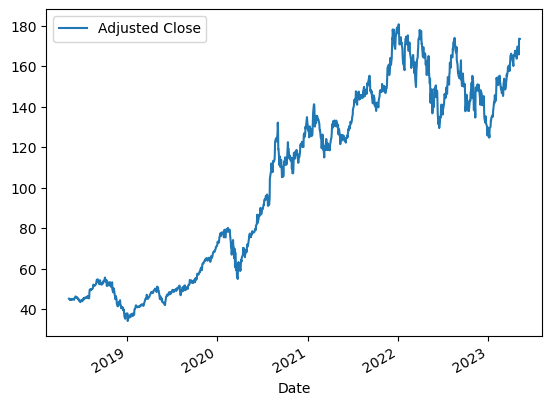

In [7]:
# plot close price
apple_df.plot("Date", "Adjusted Close")

In [ ]:
# This is a test